# QBio202: Deterministic Processes in Biology
# SS 2023
# Exercises 06 (due to 2023-05-24)

***
Ingo Giebel

Student number: 3050992
***

## Package imports

In [1]:
import matplotlib.pyplot as plt

from numpy import linspace
from pydantic import validate_arguments
from scipy.integrate import solve_ivp
from sympy import Matrix, plot, solve, solveset, Symbol, Trace
from typing import List, Tuple

## Task 1.

### Substitutions for nondimensionalization

According to (Fairén, 1979), "all quantities can be rendered dimensionless by convenient change of scales". To this end, in this paper the following substitutions (5a) - (5f) are given:
$$
\begin{align*}
    \tau &= k_2t\\
    x &= \frac{k_2}{k_3}X\\
    y &= \frac{k_2}{k_3}Y\\
    a &= \frac{k_5}{k_3}A\\
    b &= \frac{k_1}{k_3}B\\
    q &= \frac{k_3^2k_4}{k_2^2}\\
\end{align*}
$$
The above substitutions are rewritten to fit for the equations (2) and (3), as (Fairén, 1979) uses different constant and variable symbols than the symbols used here: $[X]$ instead of $X$, $X$ instead of $x$, $[Y]$ instead of $Y$, $Y$ instead of $y$, $[A]$ instead of $A$, $A$ instead of $a$, $[B]$ instead of $B$, $B$ instead of $b$, $k_2$ instead of $k_1$, $k_3$ instead of $k_2$, $k_4$ instead of $k_3$, $k_5$ instead of $k_4$, $k_1$ instead of $k_5$.

Note that according to (Fairén, 1979) the constants $k_1$, $k_2$, $k_3$, $k_5$ are reaction rates, but $k_4$ is the "dimensional power of the inhibitory step" and therefore **not a reaction rate** as opposed to what is said in the exercise sheet.

### Analysis of the quantity dimensions

Given that $t$ in equation (2) has a time dimension (common unit: $\mathrm{min}$), and $X$, $Y$, $A$, $B$ are concentration variables and constants having a molarity dimension (common unit: $1 \mathrm{M} = 1 \mathrm{mol/L}$), it follows that with the substitutions given in (5):
* $k_1$, $k_2$, $k_5$ have the dimension $\mathrm{time}^{-1}$
* $k_3$ has the dimension $\mathrm{time}^{-1}\mathrm{molarity}^{-1}$
* $k_4$ has the dimension $\mathrm{molarity}^{-1}$
* $\tau = k_2t$ is dimensionless
* $x = \frac{k_2}{k_3}X$ has the dimension $\mathrm{molarity}^2$
* $y = \frac{k_2}{k_3}Y$ has the dimension $\mathrm{molarity}^2$
* $a = \frac{k_5}{k_3}A$ has the dimension $\mathrm{molarity}^2$
* $b = \frac{k_1}{k_3}B$ has the dimension $\mathrm{molarity}^2$
* $q = k_4\frac{k_3^2}{k_2^2}$ has the dimension $\mathrm{molarity}^{-3}$

According to these considerations, the derived quantities are not dimensionless (except $\tau$) as opposed to what is stated in the paper. Yet other papers make the assumption that the concentration variables and constants are given as dimensionless quantities. Under this assumption, the molarity dimension would cancel out, and all the derived variables and constants would indeed be dimensionless.

### Biological interpretation of $a$, $b$ and $q$

$a$ is the molar increase of metabolite $A$ per time unit divided by the reaction rate constant for the metabolism of the nutrient and oxygen (reaction $X + Y \rightarrow P$).

$b$ is the molar increase of metabolite $B$ per time unit divided by the reaction rate constant for the metabolism of the nutrient and oxygen.

$q$ is the **inhibitory effect of oxygen** multiplied with the squared quotient of the reaction rate constant for the metabolism of the nutrient and oxygen divided by the reverse reaction rate constant of oxygen to metabolite $B$.

### Derivation of the nondimensionalized equations

Using the substitutions (5), the equations (2) can be rewritten as follows:
$$
\begin{align*}
    \frac{\mathrm{d}X}{\mathrm{d}t} &= k_1B - k_2X - \frac{k_3XY}{(1 + k_4X)^2}\\
    \Longrightarrow
    \frac{\mathrm{d}(\frac{k_3}{k_2}x)}{\mathrm{d}(\frac{\tau}{k_2})} &= k_1(\frac{k_3}{k_1}b) - k_2(\frac{k_3}{k_2}x) - \frac{k_3(\frac{k_3}{k_2}x)(\frac{k_3}{k_2}y)}{(1 + k_4(\frac{k_3}{k_2}x))^2}\\
    \Longrightarrow
    k_3\frac{\mathrm{d}x}{\mathrm{d}\tau} &= k_3b - k_3x - k_3\frac{(\frac{k_3}{k_2})^2xy}{(1 + k_4\frac{k_3}{k_2}x)^2}\\
    \Longrightarrow
    \frac{\mathrm{d}x}{\mathrm{d}\tau} &= b - x - \frac{xy}{(\frac{k_2}{k_3})^2(1 + k_4\frac{k_3}{k_2}x)^2}\\
    \Longrightarrow
    \frac{\mathrm{d}x}{\mathrm{d}\tau} &= b - x - \frac{xy}{(\frac{k_2}{k_3} + k_4x)^2}\\
\end{align*}
$$
The right-hand side of the above last equation evaluates to $-\frac{1}{4}$ when all variables and constants are set to $1$. On the other hand, the corresponding equation (2) evaluates to $-\frac{1}{2}$ when all variables and constants are $1$. Therefore, unless the above computations are wrong, it appears that the original equations (2) cannot be equivalently transformed to the nondimensionalized equations (3), using the substitutions given in (Fairén, 1979).

## Task 2.

In [2]:
# Symbol definitions needed for SymPy
x = Symbol("x", real=True)
y = Symbol("y", real=True)
a = Symbol("a", real=True)
b = Symbol("b", real=True)
q = Symbol("q", real=True)
# Derivative of x with respect to tau
xdot = b - x - x * y / (1 + q * x**2)
# Derivative of y with respect to tau
ydot = a - x * y / (1 + q * x**2)

In [3]:
xdot

b - x*y/(q*x**2 + 1) - x

In [4]:
ydot

a - x*y/(q*x**2 + 1)

### Stationary states

The stationary (steady) states of the differential equation system are determined by the function values $\bar{x}$, $\bar{y}$ such that for these values (equations (6, 7))
$$
\begin{align*}
    \frac{\mathrm{d}x}{\mathrm{d}\tau} &= 0\\
    \frac{\mathrm{d}y}{\mathrm{d}\tau} &= 0\\
\end{align*}
$$
Equations (6, 7) yield
$$
\begin{align*}
    b - x - \frac{xy}{1 + qx^2} &= a - \frac{xy}{1 + qx^2}\\
    \Longrightarrow
    b - x &= a\\
    \Longrightarrow
    x &= b - a\\
\end{align*}
$$
Equation (7) yields
$$
\begin{align*}
    a - \frac{xy}{1 + qx^2} &= 0\\
    \Longrightarrow
    \frac{xy}{1 + qx^2} &= a\\
    \Longrightarrow
    y &= \frac{a}{x}(1 + qx^2)\\
\end{align*}
$$
Therefore, the differential equation system has the steady state (equation 8)
$$
\begin{align*}
    \bar{x} &= b - a\\
    \bar{y} &= \frac{a}{\bar{x}}(1 + qx^2)\\
\end{align*}
$$
As the value of $x$ must be positive, it follows that $b > a$.

#### Verification with SymPy:

Steady state for x:

In [5]:
stead_states_x = solveset(f=xdot - ydot, symbol=x)
stead_states_x

{-a + b}

Steady state for y:

In [6]:
stead_states_y = solveset(f=ydot, symbol=y)
stead_states_y

{a*(q*x**2 + 1)/x}

### Jacobian matrix

With $f_1 = \frac{\mathrm{d}x}{\mathrm{d}\tau}$ and $f_2 = \frac{\mathrm{d}y}{\mathrm{d}\tau}$, the Jacobian matrix is determined by
$$
\begin{align*}
    A &=
    \begin{pmatrix}
    \frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y}\\
    \frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y}\\
    \end{pmatrix}
\end{align*}
$$

#### Computing the partial derivatives

##### $\frac{\partial f_1}{\partial x}$

In [7]:
df1_dx = xdot.diff(x).simplify()
df1_dx

q*x**2*y/(q*x**2 + 1)**2 - y/(q*x**2 + 1)**2 - 1

##### $\frac{\partial f_1}{\partial y}$

In [8]:
df1_dy = xdot.diff(y).simplify()
df1_dy

-x/(q*x**2 + 1)

##### $\frac{\partial f_2}{\partial x}$

In [9]:
df2_dx = ydot.diff(x).simplify()
df2_dx

y*(q*x**2 - 1)/(q*x**2 + 1)**2

##### $\frac{\partial f_2}{\partial y}$

In [10]:
df2_dy = ydot.diff(y).simplify()
df2_dy

-x/(q*x**2 + 1)

#### The computed Jacobian matrix

In [11]:
A = Matrix([
    [df1_dx, df1_dy],
    [df2_dx, df2_dy]
])
A

Matrix([
[q*x**2*y/(q*x**2 + 1)**2 - y/(q*x**2 + 1)**2 - 1, -x/(q*x**2 + 1)],
[                  y*(q*x**2 - 1)/(q*x**2 + 1)**2, -x/(q*x**2 + 1)]])

### Evaluation of the Jacobian at the steady state

The Jacobian at the steady state is

In [12]:
y_bar = list(stead_states_y)[0]
x_bar = list(stead_states_x)[0]

A_ss = Matrix([
    [
        df1_dx.subs(y, y_bar).subs(x, x_bar).simplify(),
        df1_dy.subs(y, y_bar).subs(x, x_bar).simplify()],
    [
        df2_dx.subs(y, y_bar).subs(x, x_bar).simplify(),
        df2_dy.subs(y, y_bar).subs(x, x_bar).simplify()]
])
A_ss

Matrix([
[(-a*q*(a - b)**2 + a + (-a + b)*(q*(a - b)**2 + 1))/((a - b)*(q*(a - b)**2 + 1)), (a - b)/(q*(a - b)**2 + 1)],
[                              -a*(q*(a - b)**2 - 1)/((a - b)*(q*(a - b)**2 + 1)), (a - b)/(q*(a - b)**2 + 1)]])

### Determinant and trace of the Jacobian at the steady state

#### Determinant of the Jacobian

The determinant $\Delta$ of the Jacobian matrix evaluated at the steady state is

In [13]:
Det_A_ss = A_ss.det()
Det_A_ss

(-a + b)/(a**2*q - 2*a*b*q + b**2*q + 1)

#### Trace of the Jacobian

The trace $T$ of the Jacobian matrix evaluated at the steady state is

In [14]:
Trace_A_ss = Trace(A_ss).simplify()
Trace_A_ss

(a - b)/(q*(a - b)**2 + 1) + (-a*q*(a - b)**2 + a - (a - b)*(q*(a - b)**2 + 1))/((a - b)*(q*(a - b)**2 + 1))

### Linear stability analysis

In order to assess the stability of the steady state, we need to examine for which parameter values the determinant and the trace of the Jacobian matrix are positive or negative when evaluated at the steady state. As the concentrations of oxygen, the nutrient and the metabolites as well as the kinetic constants and the inhibitory effect must be real positive values in the underlying model, we can assume without loss of generality that (conditions 8):
$$
\begin{align*}
    a &> 0\\
    b &> 0\\
    q &> 0\\
    a &< b\\
\end{align*}
$$

#### Derivation $\Delta > 0$

One necessary condition for the stability of the steady state is $\Delta \ge 0$. A sufficient condition would be  $\Delta > 0, T <0$. Given the general conditions (8), it follows that the first part of this sufficient condition is always fulfilled:
$$
\begin{align*}
    \Delta &> 0\\
    \iff
    \frac{-a + b}{a^2q - 2abq + b^2q + 2} &> 0\\
    \iff
    a^2q - 2abq + b^2q + 1 &> 0\\
    \iff
    a^2 - 2ab + b^2 &> -\frac{1}{q}\\
    \iff
    (a + b)^2 &> -\frac{1}{q}\\
\end{align*}
$$
As the square of a number is not negative, the initial iniquality $\Delta > 0$ holds true $\square$

### Equations for which $T = 0$ and $T^2 = 4\Delta$ (computationally solved for $q$)

#### Equation for $T = 0$

As $\Delta > 0$ holds true for this model, a value of $T > 0$ means an unstable system (either an unstable node or an unstable spiral). A value $T < 0$ means a stable system.
Therefore it needs to be examined under which conditions (parameter values) the value of $T$ is greater or lesser then zero.

In [15]:
Trace_eq_0 = solve(Trace_A_ss, q, dict=True)
Trace_eq_0

[{q: (a**2 - 2*a*b + b**2 + b)/(2*a**3 - 5*a**2*b + 4*a*b**2 - b**3)}]

#### Equation for $T^2 = 4\Delta$

As $\Delta > 0$ holds true for this model, a value of $T^2 > 4\Delta$ means either an unstable or an stable spiral, depending of whether or not $T$ is positive or negative. And a value of $T^2 < 4\Delta$ means either an unstable or an stable node.
Therefore it needs to be examined under which conditions (parameter values) the value of $T^2$ is greater or lesser then $4\Delta$.

In [16]:
Trace_sqrd_eq_4det = solve(Trace_A_ss**2 - 4 * Det_A_ss, q, dict=True)
Trace_sqrd_eq_4det

[{q: (a**4*b - 4*a**3*b**2 + 2*a**3*b + 6*a**2*b**3 - 5*a**2*b**2 - 4*a*b**4 + 4*a*b**3 + b**5 - b**4 - 2*sqrt(-a**10 + 9*a**9*b - 4*a**9 - 36*a**8*b**2 + 30*a**8*b + 84*a**7*b**3 - 98*a**7*b**2 - 126*a**6*b**4 + 182*a**6*b**3 + 126*a**5*b**5 - 210*a**5*b**4 - 84*a**4*b**6 + 154*a**4*b**5 + 36*a**3*b**7 - 70*a**3*b**6 - 9*a**2*b**8 + 18*a**2*b**7 + a*b**9 - 2*a*b**8))/(4*a**6 - 20*a**5*b + 41*a**4*b**2 - 44*a**3*b**3 + 26*a**2*b**4 - 8*a*b**5 + b**6)},
 {q: (a**4*b - 4*a**3*b**2 + 2*a**3*b + 6*a**2*b**3 - 5*a**2*b**2 - 4*a*b**4 + 4*a*b**3 + b**5 - b**4 + 2*sqrt(-a**10 + 9*a**9*b - 4*a**9 - 36*a**8*b**2 + 30*a**8*b + 84*a**7*b**3 - 98*a**7*b**2 - 126*a**6*b**4 + 182*a**6*b**3 + 126*a**5*b**5 - 210*a**5*b**4 - 84*a**4*b**6 + 154*a**4*b**5 + 36*a**3*b**7 - 70*a**3*b**6 - 9*a**2*b**8 + 18*a**2*b**7 + a*b**9 - 2*a*b**8))/(4*a**6 - 20*a**5*b + 41*a**4*b**2 - 44*a**3*b**3 + 26*a**2*b**4 - 8*a*b**5 + b**6)}]

### Plot the equations for which $T = 0$ and $T^2 = 4\Delta$ for the fixed value $q = 20$

The trace $T$ of the Jacobian matrix evaluated at the steady state for the fixed value $q = 20$ is

In [17]:
Trace_A_ss_q_fix = Trace_A_ss.subs(q, 20).simplify()
Trace_A_ss_q_fix

(-20*a*(a - b)**2 + a + (a - b)**2 - (a - b)*(20*(a - b)**2 + 1))/((a - b)*(20*(a - b)**2 + 1))

The determinant $\Delta$ of the Jacobian matrix evaluated at the steady state for the fixed value $q = 20$ is

In [18]:
Det_A_ss_q_fix = Det_A_ss.subs(q, 20).simplify()
Det_A_ss_q_fix

(-a + b)/(20*a**2 - 40*a*b + 20*b**2 + 1)

#### Equation for $T = 0$

In [19]:
Trace_eq_0_q_fix = solve(Trace_A_ss_q_fix, b)
Trace_eq_0_q_fix

[4*a/3 - (-15*a**2 + 3*a/10 + (1/20 - 4*a)**2 - 3/20)/(3*(-27*a**3 + 27*a**2/40 + (1/20 - 4*a)**3 - (9/20 - 36*a)*(5*a**2 - a/10 + 1/20)/2 + sqrt(-4*(-15*a**2 + 3*a/10 + (1/20 - 4*a)**2 - 3/20)**3 + (-54*a**3 + 27*a**2/20 + 2*(1/20 - 4*a)**3 - (9/20 - 36*a)*(5*a**2 - a/10 + 1/20))**2)/2)**(1/3)) - (-27*a**3 + 27*a**2/40 + (1/20 - 4*a)**3 - (9/20 - 36*a)*(5*a**2 - a/10 + 1/20)/2 + sqrt(-4*(-15*a**2 + 3*a/10 + (1/20 - 4*a)**2 - 3/20)**3 + (-54*a**3 + 27*a**2/20 + 2*(1/20 - 4*a)**3 - (9/20 - 36*a)*(5*a**2 - a/10 + 1/20))**2)/2)**(1/3)/3 - 1/60,
 4*a/3 - (-15*a**2 + 3*a/10 + (1/20 - 4*a)**2 - 3/20)/(3*(-1/2 - sqrt(3)*I/2)*(-27*a**3 + 27*a**2/40 + (1/20 - 4*a)**3 - (9/20 - 36*a)*(5*a**2 - a/10 + 1/20)/2 + sqrt(-4*(-15*a**2 + 3*a/10 + (1/20 - 4*a)**2 - 3/20)**3 + (-54*a**3 + 27*a**2/20 + 2*(1/20 - 4*a)**3 - (9/20 - 36*a)*(5*a**2 - a/10 + 1/20))**2)/2)**(1/3)) - (-1/2 - sqrt(3)*I/2)*(-27*a**3 + 27*a**2/40 + (1/20 - 4*a)**3 - (9/20 - 36*a)*(5*a**2 - a/10 + 1/20)/2 + sqrt(-4*(-15*a**2 + 3*a/10 

In [20]:
Trace_eq_0_q_fix[0]

4*a/3 - (-15*a**2 + 3*a/10 + (1/20 - 4*a)**2 - 3/20)/(3*(-27*a**3 + 27*a**2/40 + (1/20 - 4*a)**3 - (9/20 - 36*a)*(5*a**2 - a/10 + 1/20)/2 + sqrt(-4*(-15*a**2 + 3*a/10 + (1/20 - 4*a)**2 - 3/20)**3 + (-54*a**3 + 27*a**2/20 + 2*(1/20 - 4*a)**3 - (9/20 - 36*a)*(5*a**2 - a/10 + 1/20))**2)/2)**(1/3)) - (-27*a**3 + 27*a**2/40 + (1/20 - 4*a)**3 - (9/20 - 36*a)*(5*a**2 - a/10 + 1/20)/2 + sqrt(-4*(-15*a**2 + 3*a/10 + (1/20 - 4*a)**2 - 3/20)**3 + (-54*a**3 + 27*a**2/20 + 2*(1/20 - 4*a)**3 - (9/20 - 36*a)*(5*a**2 - a/10 + 1/20))**2)/2)**(1/3)/3 - 1/60

#### Equation for $T^2 = 4\Delta$

In [21]:
Trace_sqrd_eq_4det_q_fix = solve(Trace_A_ss_q_fix**2 - 4 * Det_A_ss_q_fix, b)
Trace_sqrd_eq_4det_q_fix

[]

It appears that SymPy does not find any solution for the case $T^2 = 4\Delta$. Therefore, only the parameter space $T = 0$ is plotted.

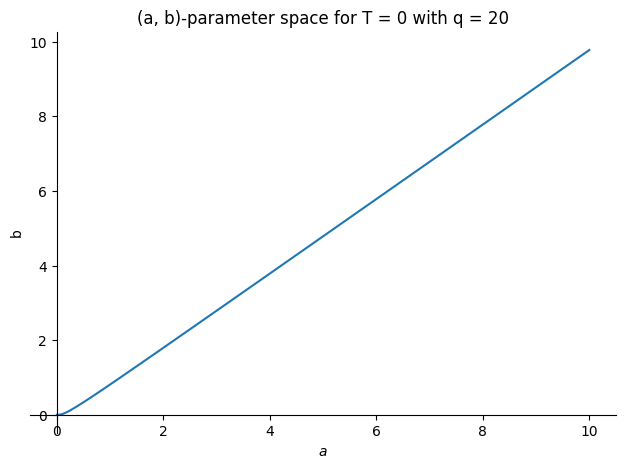

In [22]:
plot(
    Trace_eq_0_q_fix[0], (a, 0, 10),
    ylabel = "b",
    title = "(a, b)-parameter space for T = 0 with q = 20")

## Task 3.

### Python class that encapsulates the data and functions for simulating the model

In [23]:
class RespirationModel:
    """
    Simulation of a simplified respiration model constructed using the
    metabolism of Klebsiella aerogenes.

    This class encapsulates the data and functions for simulating the model.
    """

    __slots__ = (
        "a",
        "b",
        "q",
        "tau_span",
        "sol")

    @validate_arguments
    def __init__(
            self,
            a: float = 1.0,
            b: float = 2.0,
            q: float = 1.0,
            ) -> None:

        self.a: float = a
        self.b: float = b
        self.q: float = q

    @validate_arguments
    def fun(self, tau: float, xy) -> List[float]:
        """Right-hand side of the system of ODEs."""

        x, y = xy[0], xy[1]
        # Derivative of x with respect to tau
        xdot = self.b - x - x * y / (1 + self.q * x**2)
        # Derivative of y with respect to tau
        ydot = self.a - x * y / (1 + self.q * x**2)
        
        return [xdot, ydot]

    @validate_arguments
    def solve_ivp(self, tau_span: Tuple[float, float], x0: float, y0: float) -> None:
        """Solve the initial value problem for the system of ODEs."""

        self.tau_span: Tuple[float, float] = tau_span
        self.sol = solve_ivp(
            fun=self.fun,
            t_span=tau_span,
            y0=[x0, y0],
            method="Radau",
            dense_output=True)

    def plot(self) -> None:
        """Plot the computed solution."""

        tau = linspace(start=self.tau_span[0], stop=self.tau_span[1], num=100000)
        plt.figure(figsize = (15, 5))
        plt.plot(tau, self.sol.sol(tau).T)
        plt.xlabel(r"$\tau$")
        plt.legend([r"$x$", r"$y$"], shadow=True)
        plt.suptitle("Simulation of a simplified respiration model")
        plt.title(fr"Parameter: $a = {self.a}$,  $b = {self.b}$,  $q = {self.q}$", loc="left")
        plt.show()

### Numerical simulation of the model with varying parameter values

The following plots show that for a wide range of parameters the system converges to a stable steady state. But for greater values of $q$ and values of $a$ close to $b$ the system oscillates, indicating an unstable spiral. This is the case for e.g. the following parameter combinations:
* $q = 20.0,  a = 1.5, b = 2.0$
* $q = 20.0,  a = 1.7, b = 2.0$
* $q = 100.0, a = 1.5, b = 2.0$
* $q = 100.0, a = 1.7, b = 2.0$
* $q = 100.0, a = 1.9, b = 2.0$

The frequency of these oscillations decreases with increasing $q$.

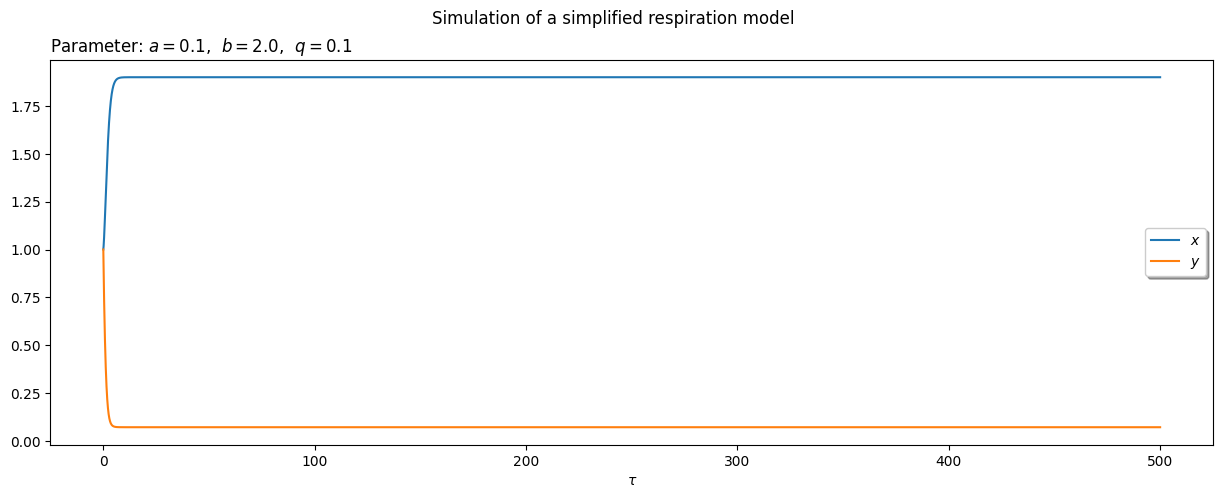

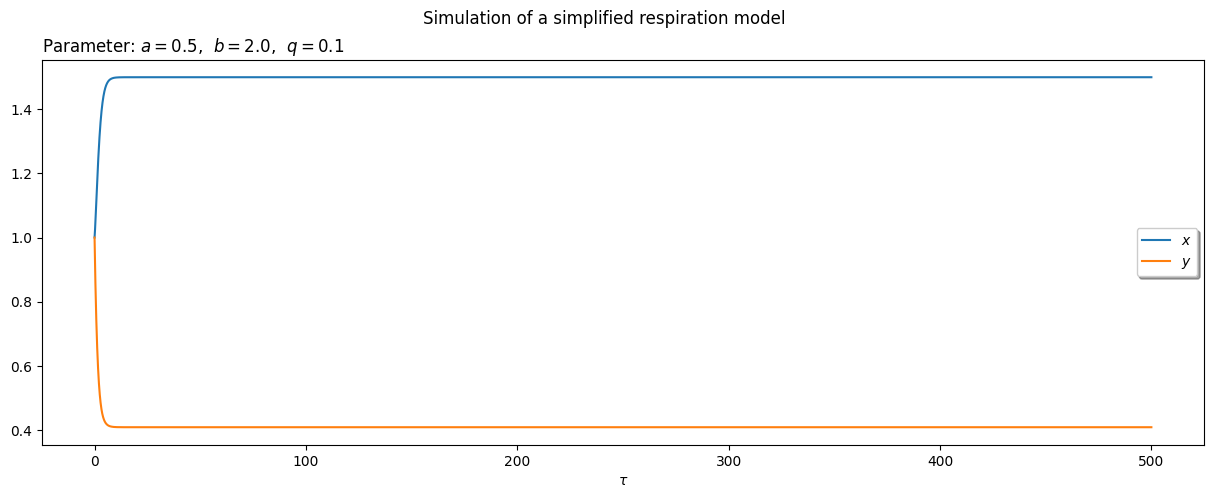

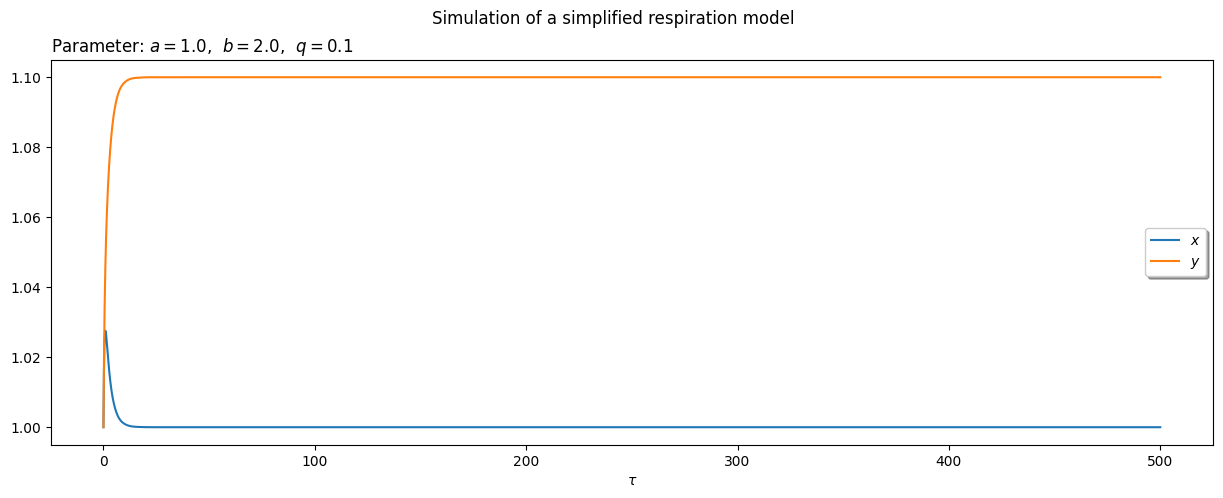

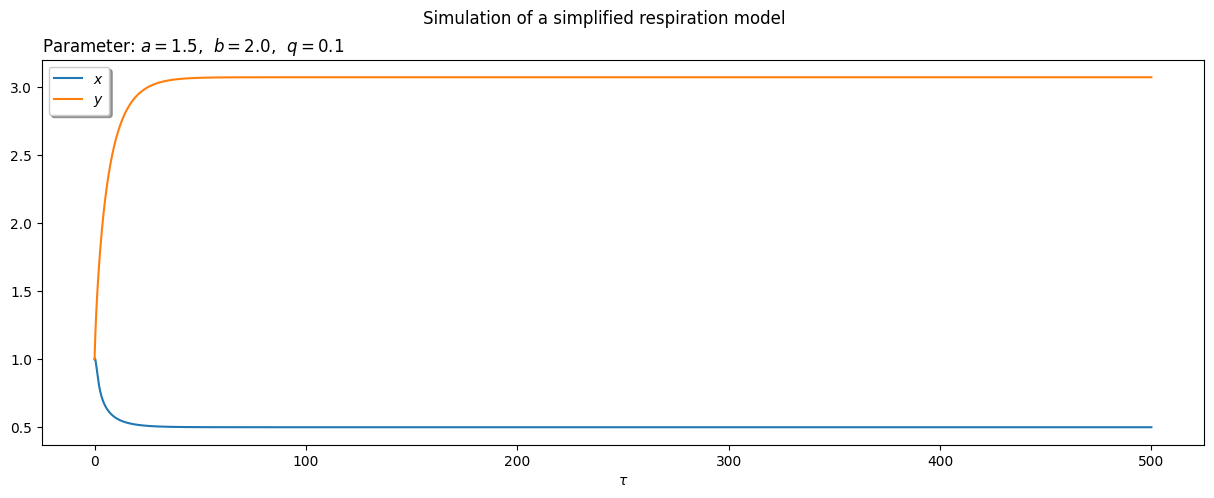

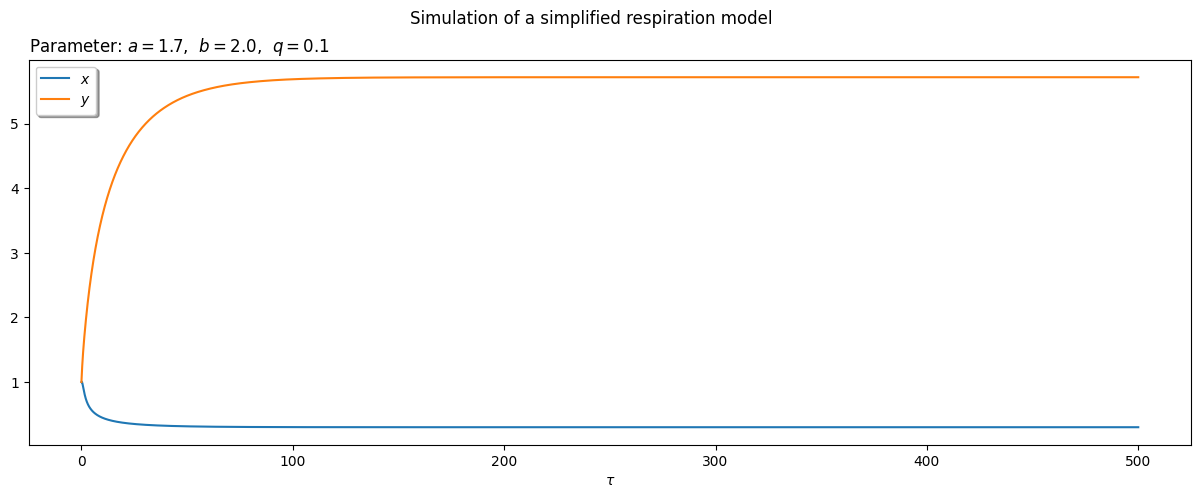

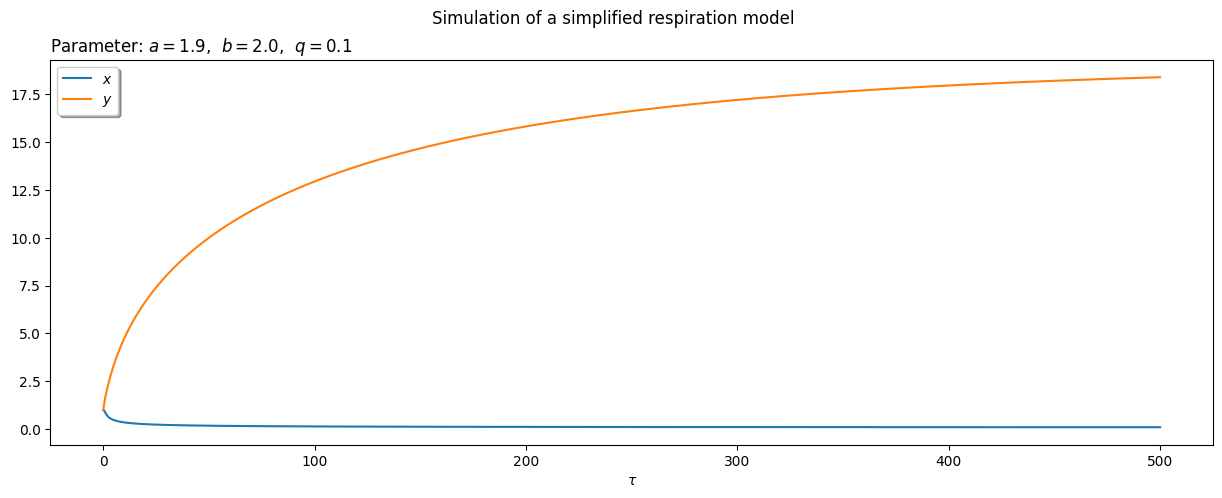

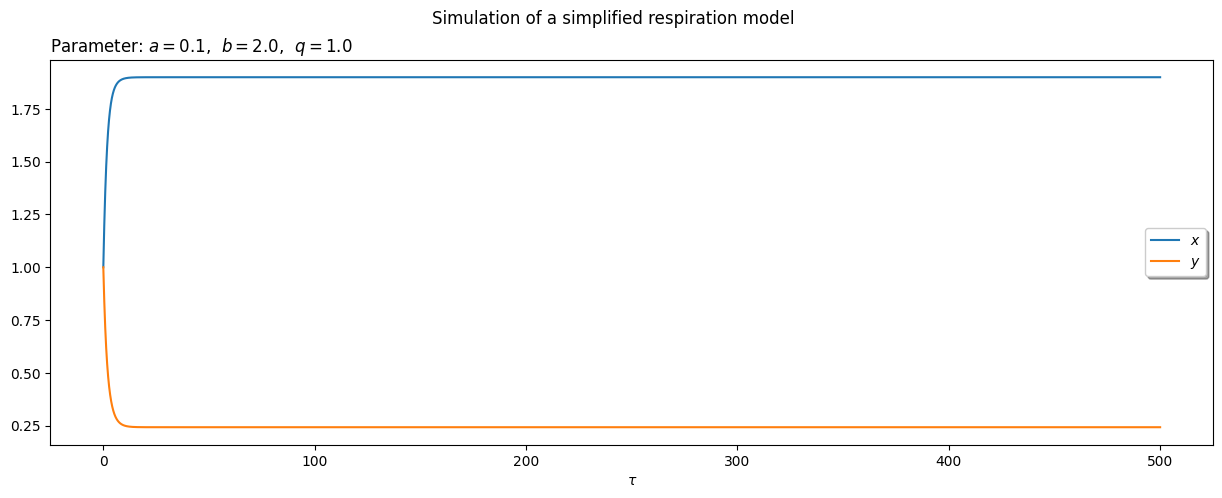

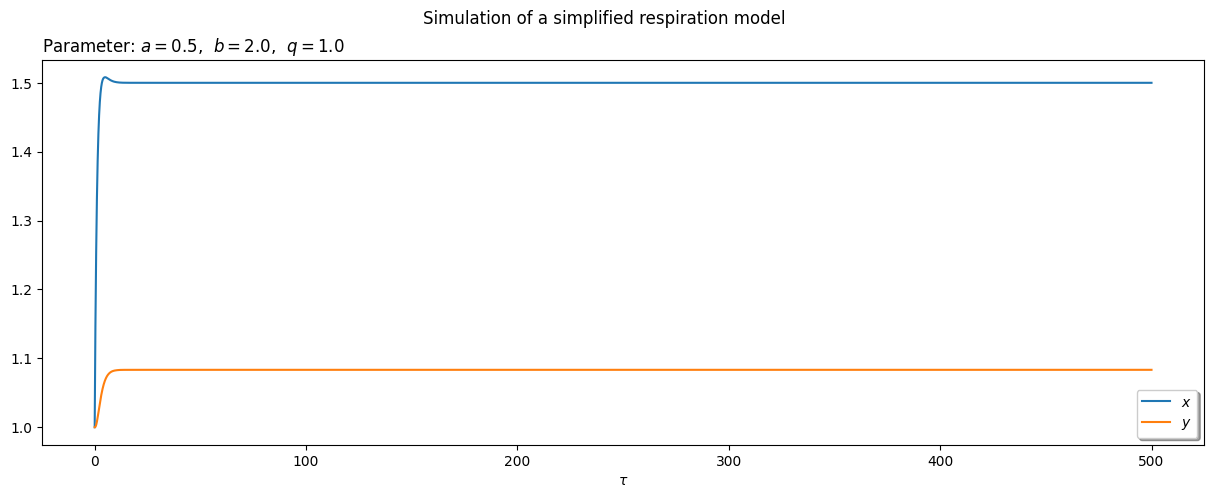

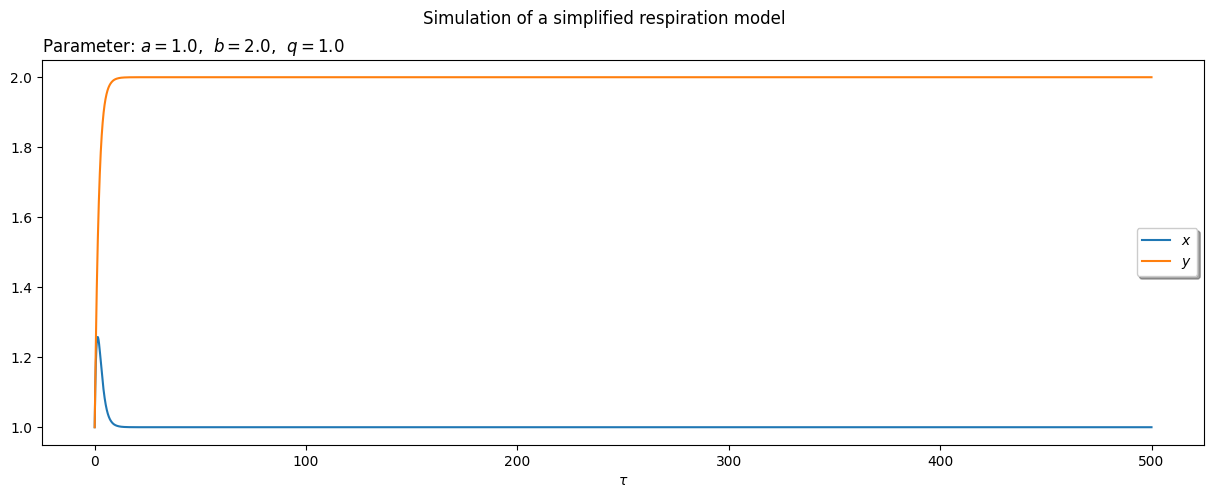

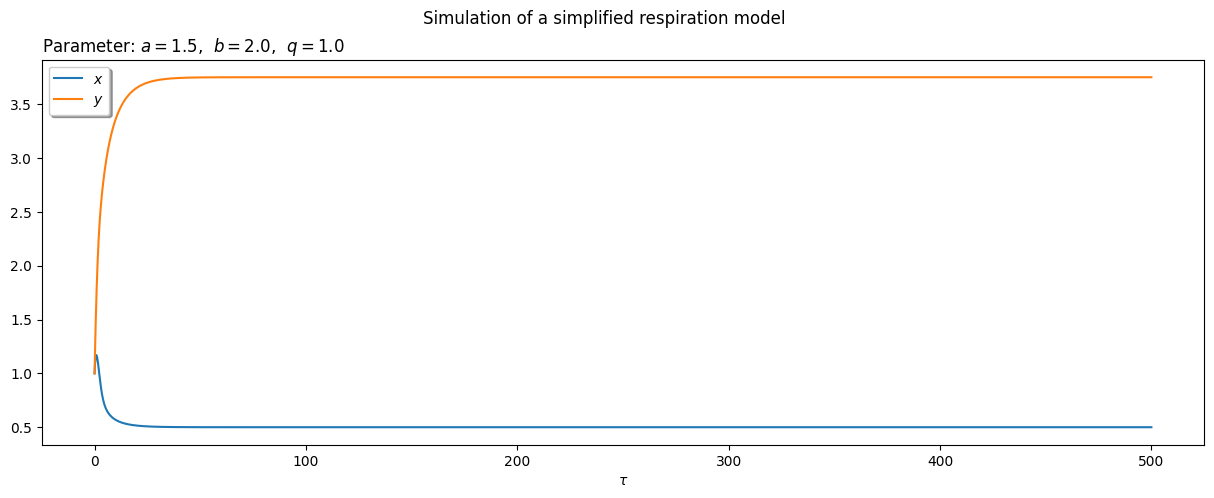

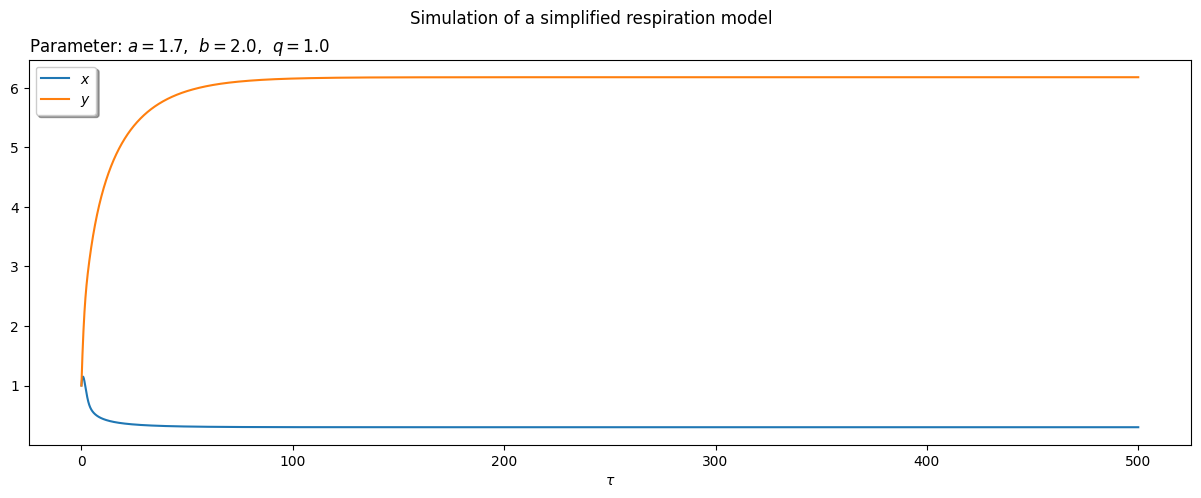

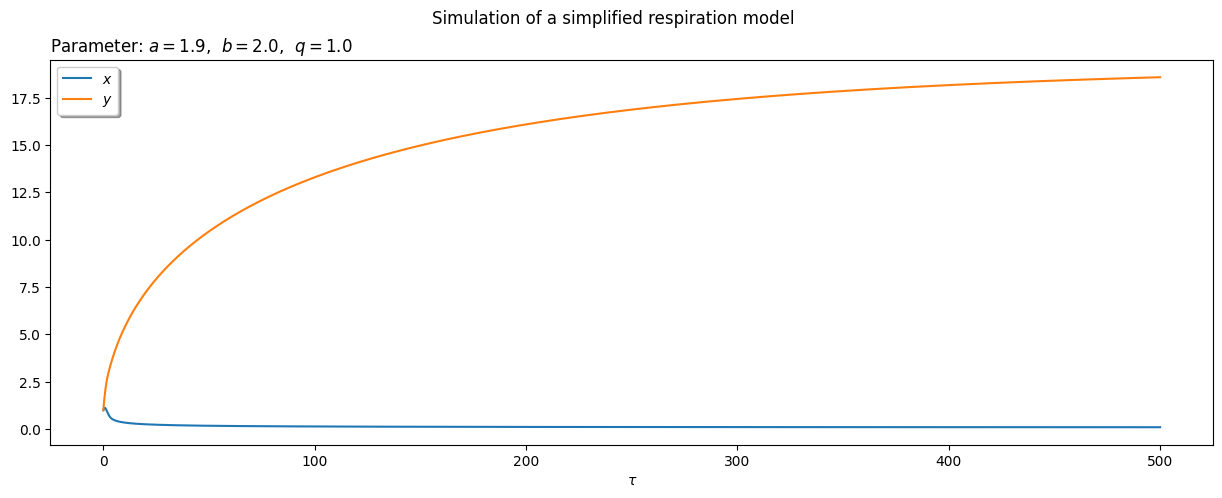

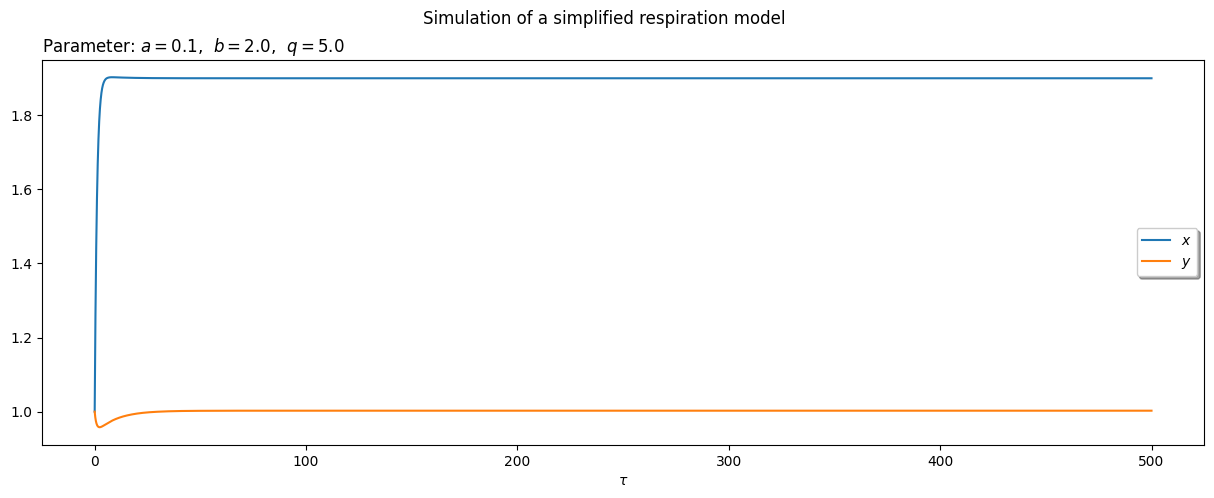

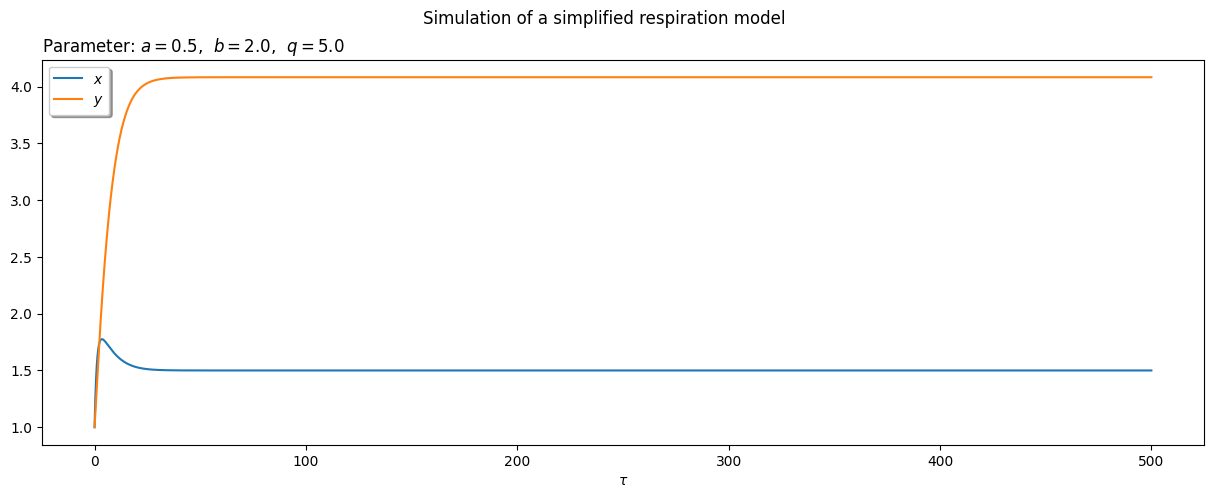

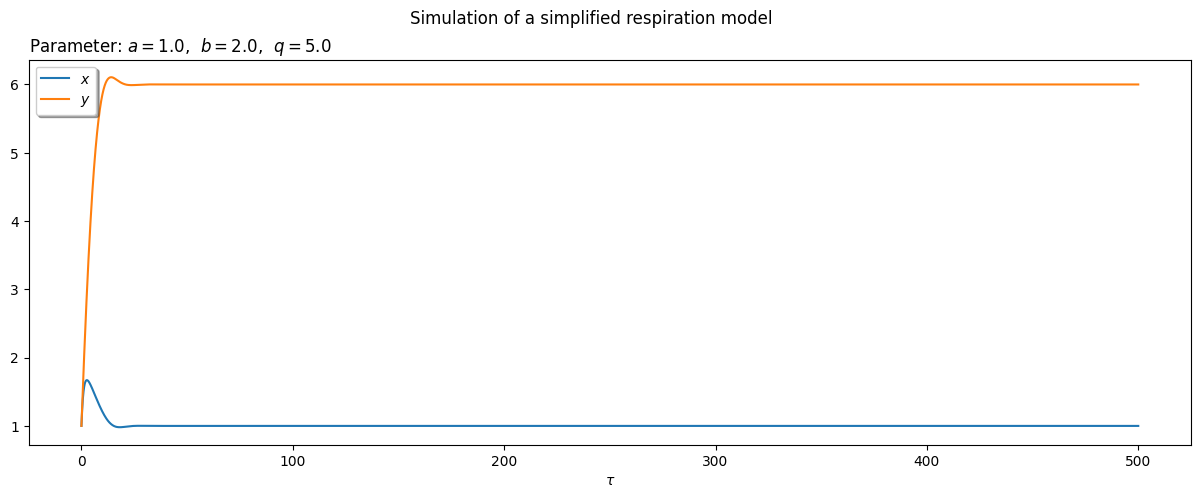

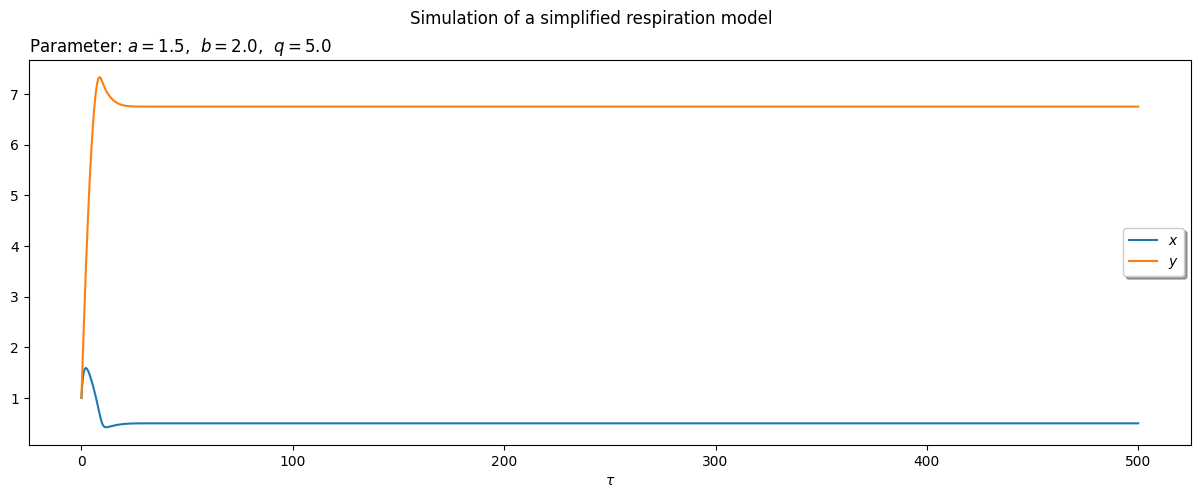

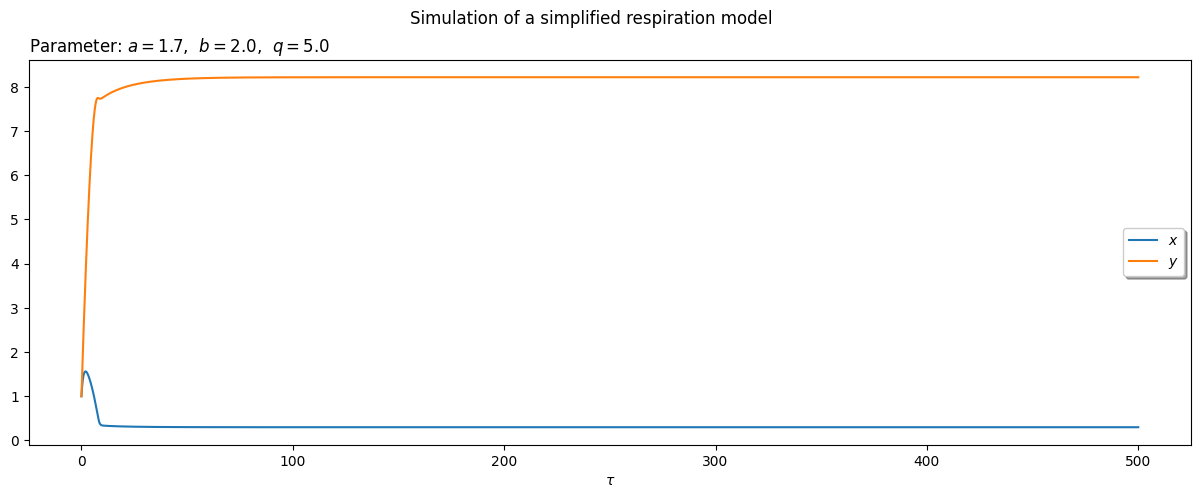

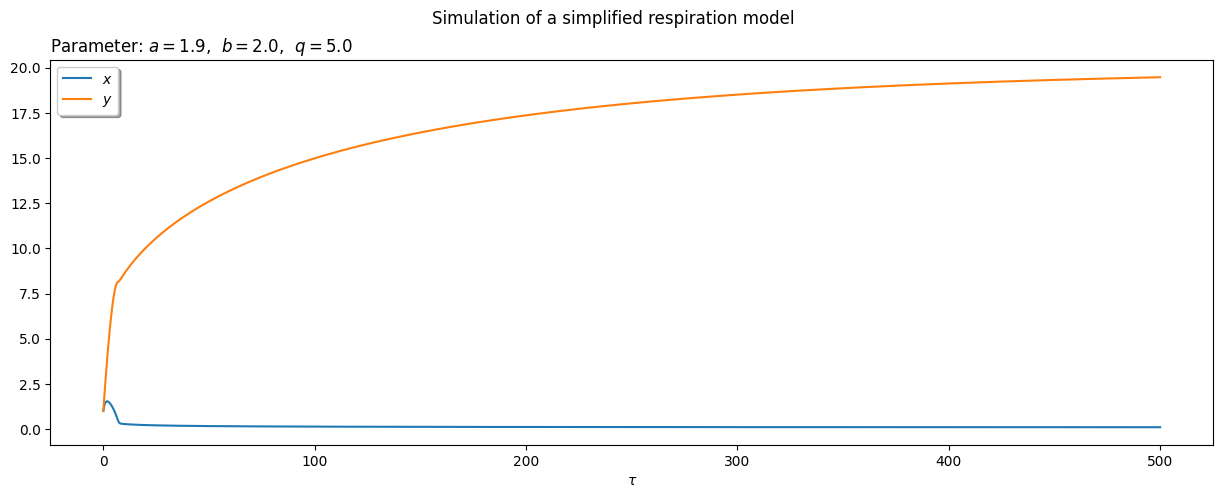

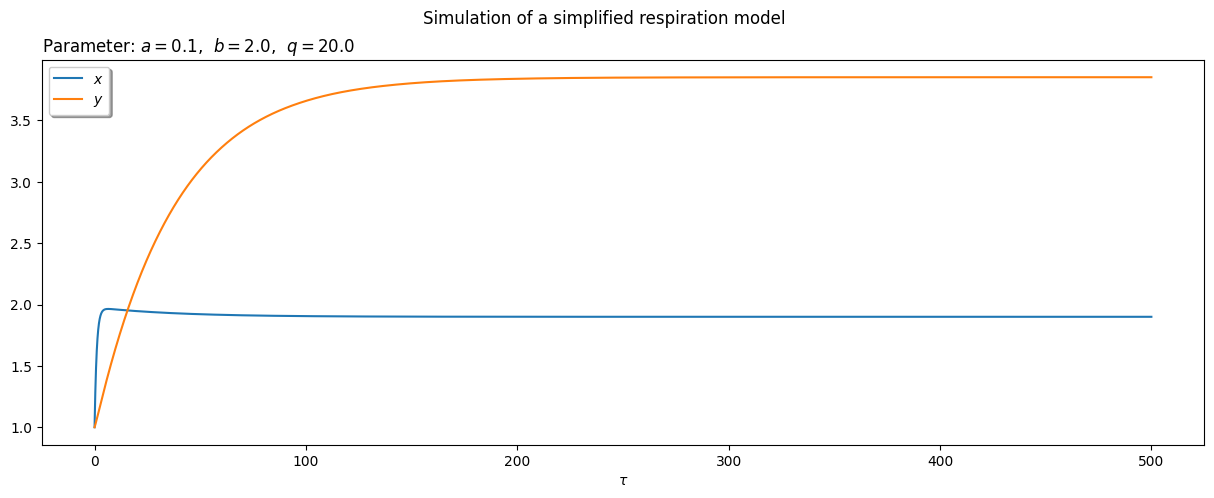

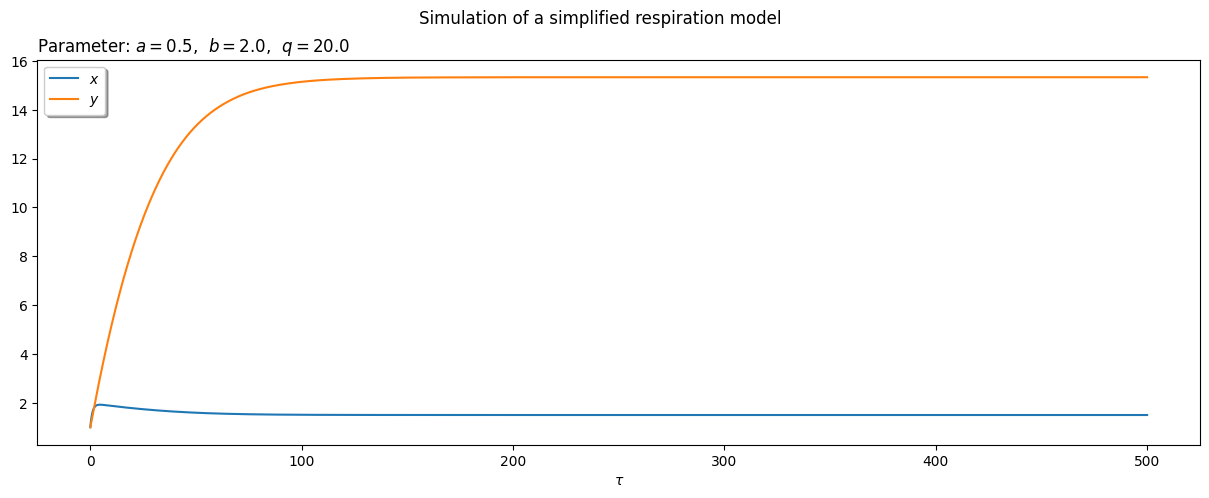

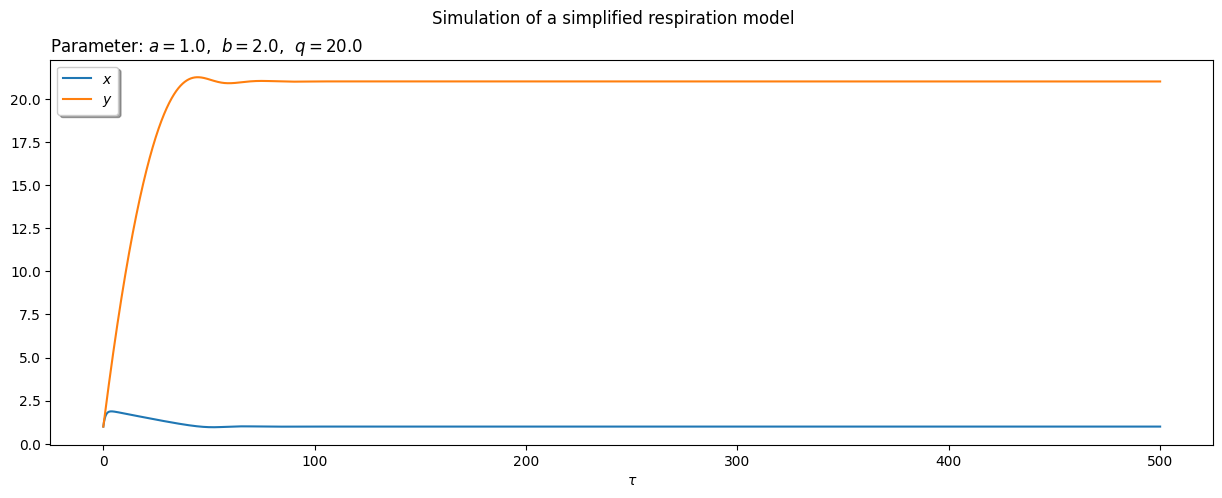

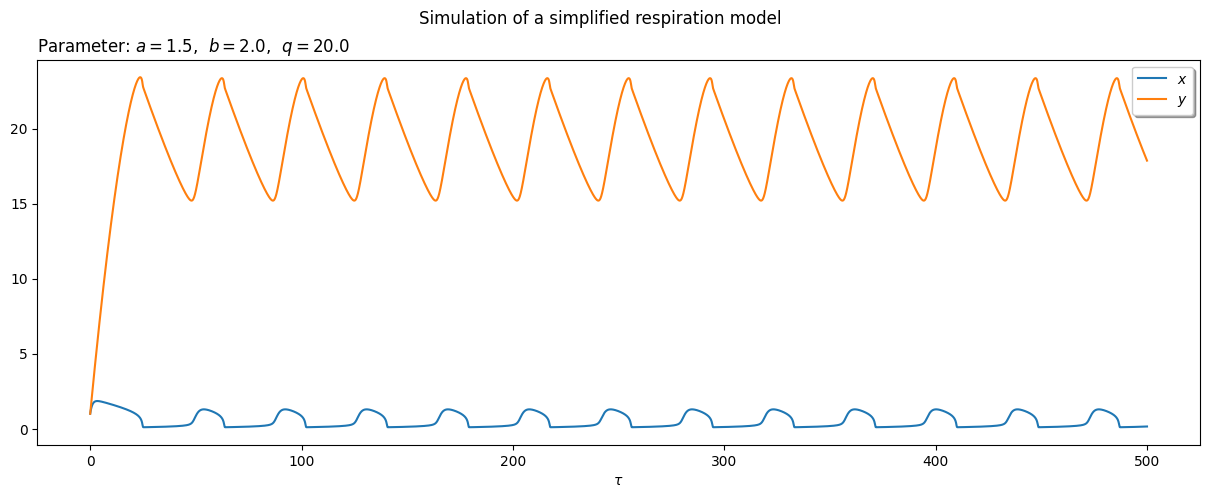

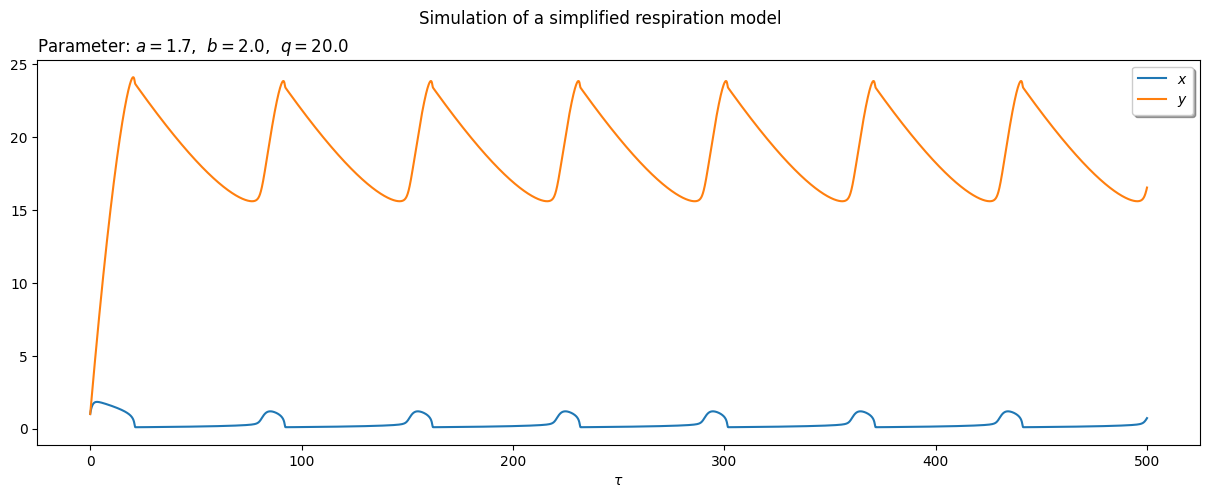

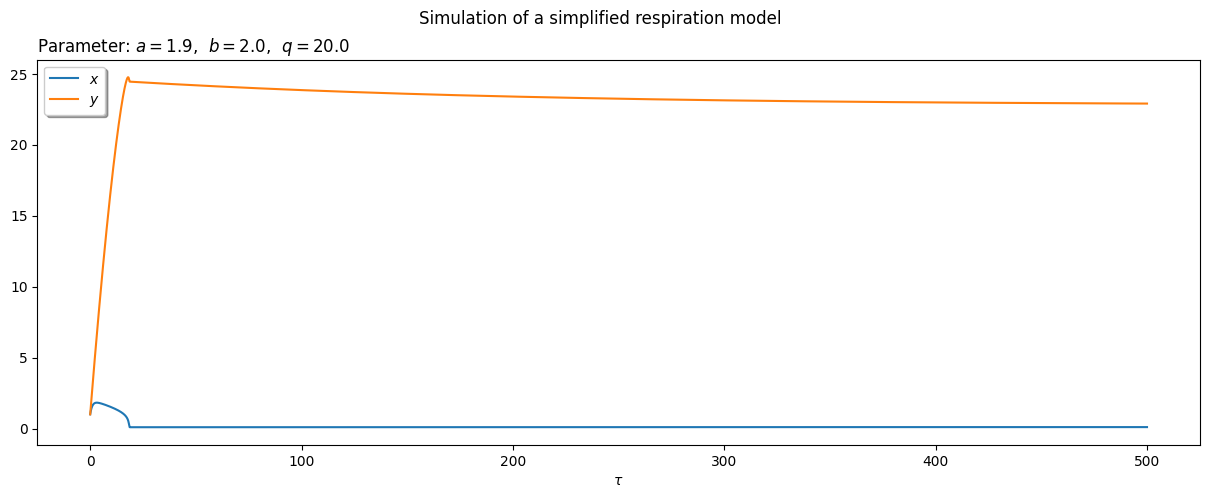

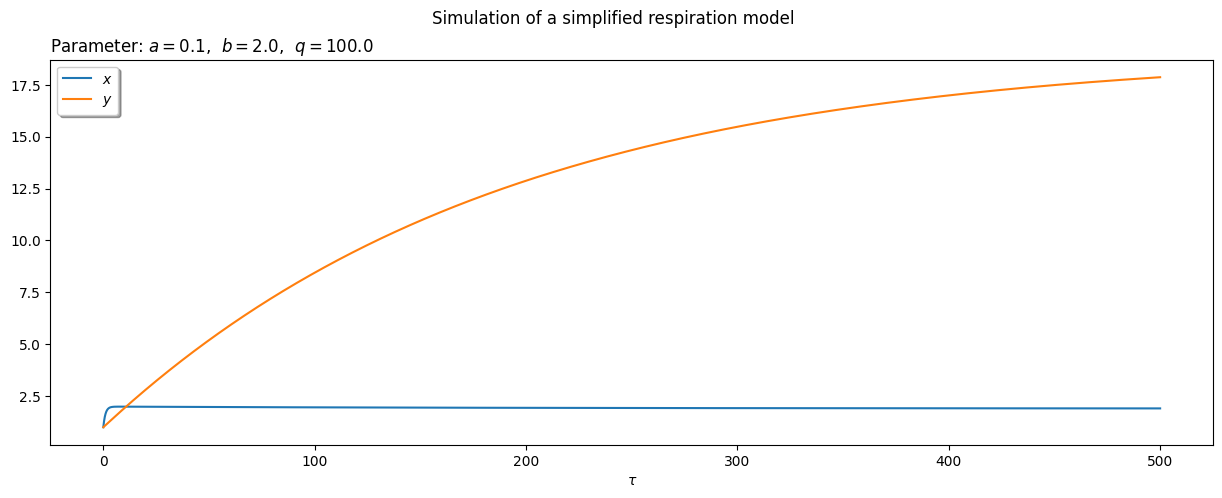

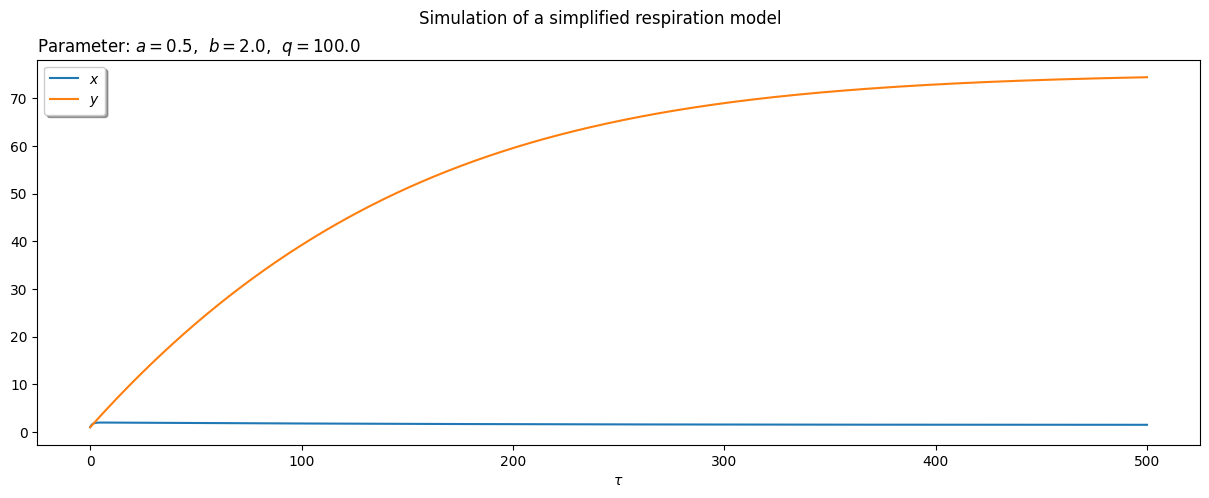

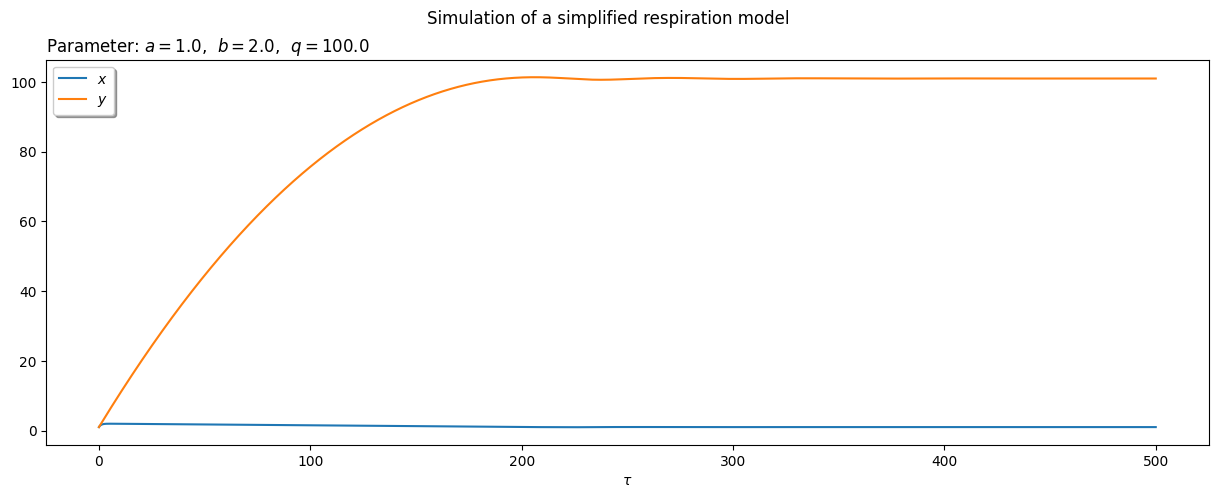

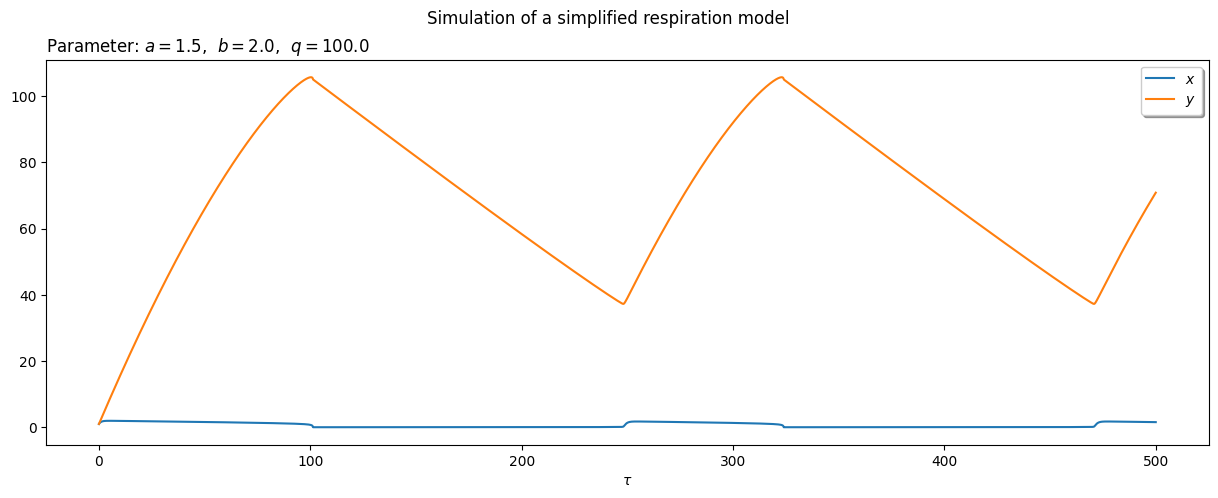

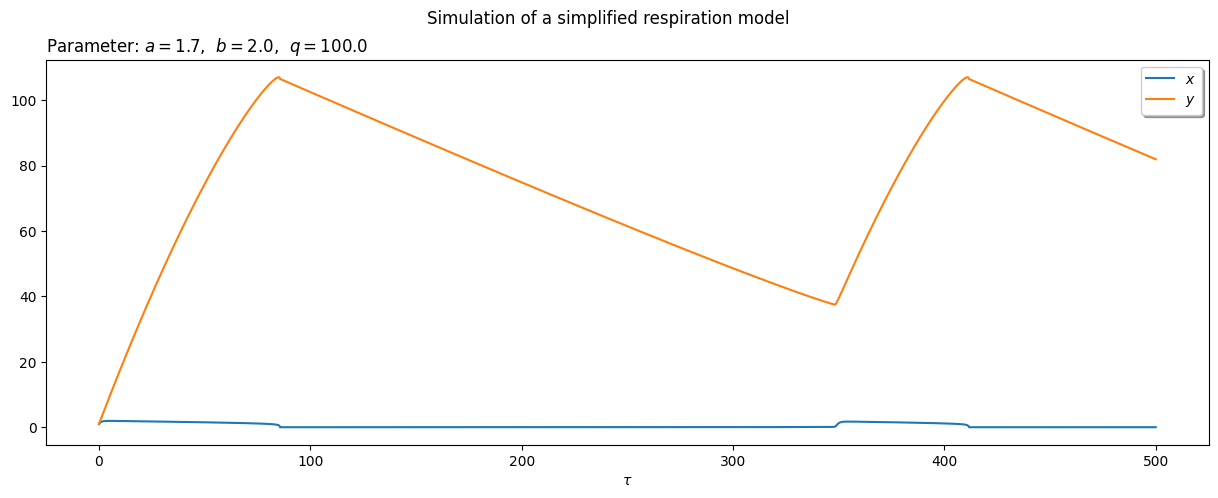

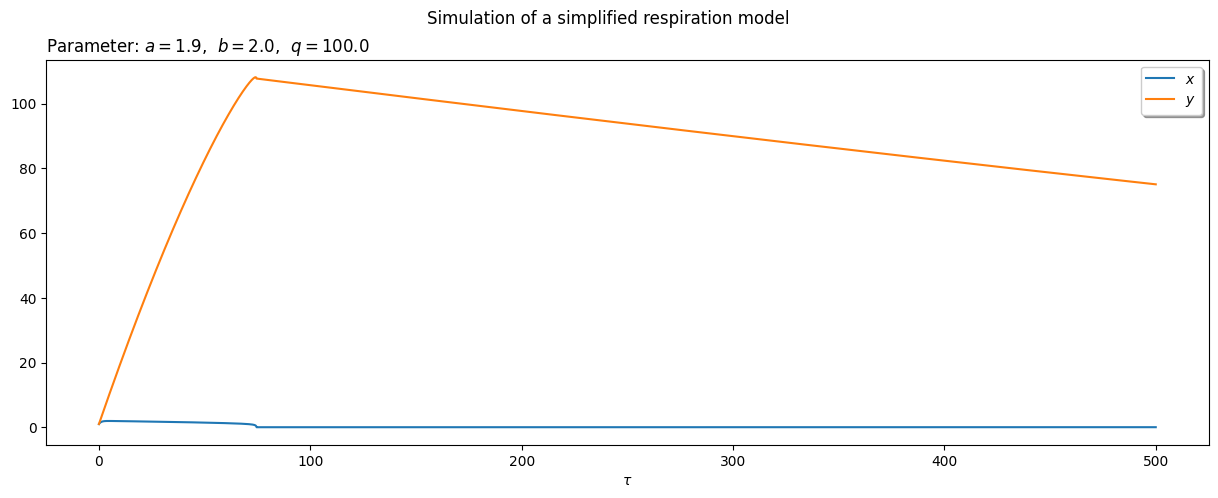

In [24]:
for (a, b, q) in (
    [0.1, 2.0, 0.1],
    [0.5, 2.0, 0.1],
    [1.0, 2.0, 0.1],
    [1.5, 2.0, 0.1],
    [1.7, 2.0, 0.1],
    [1.9, 2.0, 0.1],

    [0.1, 2.0, 1.0],
    [0.5, 2.0, 1.0],
    [1.0, 2.0, 1.0],
    [1.5, 2.0, 1.0],
    [1.7, 2.0, 1.0],
    [1.9, 2.0, 1.0],

    [0.1, 2.0, 5.0],
    [0.5, 2.0, 5.0],
    [1.0, 2.0, 5.0],
    [1.5, 2.0, 5.0],
    [1.7, 2.0, 5.0],
    [1.9, 2.0, 5.0],

    [0.1, 2.0, 20.0],
    [0.5, 2.0, 20.0],
    [1.0, 2.0, 20.0],
    [1.5, 2.0, 20.0],
    [1.7, 2.0, 20.0],
    [1.9, 2.0, 20.0],

    [0.1, 2.0, 100.0],
    [0.5, 2.0, 100.0],
    [1.0, 2.0, 100.0],
    [1.5, 2.0, 100.0],
    [1.7, 2.0, 100.0],
    [1.9, 2.0, 100.0]):

    model = RespirationModel(a=a, b=b, q=q)
    model.solve_ivp(tau_span=(0.0, 500.0), x0=1.0, y0=1.0)
    model.plot()